## Researsch  on Megaline's prepaid plans 

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, _Surf_ and _Ultimate_. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

# Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from functools import reduce

import warnings
warnings.filterwarnings('ignore')

calls = pd.read_csv("/datasets/megaline_calls.csv")

internet = pd.read_csv("/datasets/megaline_internet.csv")

messages = pd.read_csv("/datasets/megaline_messages.csv")

plans = pd.read_csv("/datasets/megaline_plans.csv")

users = pd.read_csv("/datasets/megaline_users.csv")

We have opened all data files we have and store it as pandas dataframes to work with python. Let's see the detailed info about each one. 

In [2]:
#print(calls.info())
#print(calls.head())

#print(calls.isnull().sum())

The _calls_ dataset at least looks like a "normal" table (we don't need to use "sep" or "decimal" parameter of _read_csv()_ function, which were introduced in our previous theory chapter).

As we can see in the output, we have a few issues with the data:

- Ids are saved as objects, but it seems, that this entries consist from numbers and underscore. If we get rid of underscores, we may save data in this column as integers to save memory. (Sure, the IDs must stay unique values.)

- Some of datatypes do not suits the saved data (e.g. float64 for call durations in seconds(we can round it up), "call_date" as object etc.). We have to handle it.

- Some data can be missing, though we do not see any signs of it in the _head()_ output. 

- We also don't see any duplicates in the _head()_ method output, but we have to check it more precisely and (if necessary) to handle it.

In [3]:
#print(internet.info())
#print(internet.head())
#print(internet.isnull().sum())

The _internet_ dataset at least looks like a "normal" table (we don't need to use "sep" or "decimal" parameter of _read_csv()_ function, which were introduced in our previous theory chapter).

As we can see in the output, we have a few issues with the data:

- We have 33K rows less in this table(in compare to _calls_ table). Maybe 33K customers does not used internet at all (this version is very doubtful: in the _head()_ output of user 1000_204 we see 0.0 mb_used), or we have some missing data(seems to be more realistic). We have to check it. 

- Ids are saved as objects, but it seems, that this entries consist from numbers and underscore. If we get rid of underscores, we may save data in this column as integers to save memory. (Sure, the IDs must stay unique values.)

- Some of datatypes do not suits the saved data (e.g. float64 for _mb_used_ in mb(we can round it up), "session_date" as object etc.). We have to handle it.

- Some data can be missing, though we do not see any signs of it in the _head()__ output. 

- We also don't see any duplicates in the _head()_ method output, but we have to check it more precisely and (if necessary) to handle it.

In [4]:
#print(messages.info())
#print(messages.tail())
#print(messages.isnull().sum())

The _messages_ dataset at least looks like a "normal" table (we don't need to use "sep" or "decimal" parameter of _read_csv()_ function, which were introduced in our previous theory chapter).

As we can see in the output, we have a few issues with the data:

- We have twice less data in this table (in compare to calls table). May be the half of customers does not used messages at all, or we have some missing data. We have to check it. 

- Ids are saved as objects, but it seems, that this entries consist from numbers and underscore. If we get rid of underscores, we may save data in this column as integers to save memory. (Sure, the IDs must stay unique values.)

- Some of datatypes do not suits the saved data (e.g. int64 for _user_id_ which are seems to be really small integers, "message_date" as object etc.). We have to handle it.

- Some data can be missing, though we do not see any signs of it in the _head()_ output. 

- We also don't see any duplicates in the _head()_ method output, but we have to check it more precisely and (if necessary) to handle it.

In [5]:
#print(plans.info())
#print(plans.tail())

The _plans_ dataset looks like a "normal" table (we don't need to use "sep" or "decimal" parameter of _read_csv()_ function, which were introduced in our previous theory chapter).

As we can see in the output, we have a few issues with the data:

- Some of datatypes do not suits the saved data (e.g. int64 for _messages_included_, _mb_per_month_included_, _minutes_included_, _usd_per_gb_,  which are seems to be really small integers, etc.). We have to handle it. 

- we can rename columns _usd_per_message/usd_per_minute_ and save date in cents to avoid using floats. But we have a tiny 256.0+ bytes table, so in this case we can also leave it as is. 

In [6]:
#print(users.info())
#print(users.tail())
#print(users.isnull().sum())

The _users_ dataset looks like a "normal" table (we don't need to use "sep" or "decimal" parameter of _read_csv()_ function, which were introduced in our previous theory chapter).

We know now, that we have data of 500 users only, so it seems to be okay, that the tables calls, messeges, internet have the different lenght. 

As we can see in the output, we have a few issues with the data:

- Some of datatypes do not suits the saved data (e.g. int64 for _age_, _user_id_ which are seems to be really small integers, "plan" as object etc.). We have to handle it.

- Some data can be missing, though we do not see any signs of it in the _head()_ output. 

- We also don't see any duplicates in the _head()_ method output, but we have to check it more precisely and (if necessary) to handle it.

### Step 1. Conclusion

At first we have imported data from each .csv-file to a corresponding dataframes in our system to work with python.

We have no NaN in our dataset. (Except the _churn_date_ column, but the majority of customers have no churn date, so it is all right.)

All the data seems to be in really good shape with only a few minor datatype issuses we can fast handle, what we are going to do next.  

# Step 2. Data preprocessing

Let's convert the data to the necessary types. But at first we have to round minutes und internet sessions up. We do not really need the exact float values and we can save some memory. 

In [7]:
calls['duration'] = calls['duration'].apply(math.ceil)

internet['mb_used'] = internet['mb_used'].apply(math.ceil)

#internet.head()
#internet['mb_used'].max()

messages['user_id'].max()

1497

In [8]:
#print(calls.info())
#print(internet.info())
#print(messages.info())
#print(users.info())

calls['duration']=calls['duration'].astype('int8')
calls['user_id']=calls['user_id'].astype('int16')
calls['call_date']=calls['call_date'].astype("datetime64")

internet['user_id']=internet['user_id'].astype('int16')
internet['mb_used']= internet['mb_used'].astype('int16')
internet['session_date']=internet['session_date'].astype("datetime64")

messages['user_id']=messages['user_id'].astype('int16')
messages['message_date']=messages['message_date'].astype("datetime64")

users['user_id']=users['user_id'].astype('int16')
users['age']=users['age'].astype('int8')
users['reg_date'] = users['reg_date'].astype("datetime64")
users['churn_date'] = users['churn_date'].astype("datetime64")

users = users.drop(columns=['first_name', 'last_name'])


#print(calls.info())
#print(internet.info())
#print(messages.info())
#print(users.info())

We saved 
- 4.2 -> 2.5,
- 3.2 -> 2.0,
- 1.7 -> 1.3

up to 40% used memory (without dropping any data in first three cases). It is not really important in this particular case, but it can be very useful during the work with large datasets.

We also droped some personal data in _users_ dataframe we do not need for our analysis(name & surname of customers)

Let's check, if we have any duplicates in our dataset.

In [9]:
print(len(calls))
print(len(internet))
print(len(messages))

137735
104825
76051


In [10]:
calls.drop_duplicates(inplace=True)

internet.drop_duplicates(inplace=True)

messages.drop_duplicates(inplace=True)

In [11]:
print(len(calls))
print(len(internet))
print(len(messages))

137735
104825
76051


We had no duplucates in our data. We are going to change our datasets a bit to make easier working with it. 

In [12]:
users.set_index(users['user_id'],inplace=True)

In [13]:
users.drop('user_id', axis=1, inplace=True)

In [14]:
calls['date'] = calls['call_date']

calls.drop('call_date', axis=1, inplace=True)
#print(calls.info())

In [15]:
internet['date'] = internet['session_date']
internet.set_index(internet["session_date"],inplace=True)
internet.drop('session_date', axis=1, inplace=True)

In [16]:
messages['date'] = messages['message_date']
messages.set_index(messages["message_date"],inplace=True)
messages.drop('message_date', axis=1, inplace=True)

In [17]:
def add_month(date):
    if date.month == 12:
        return 'December'
    if date.month == 11:
        return 'November'
    if date.month == 10:
        return 'October'
    if date.month == 9:
        return 'September'
    if date.month == 8:
        return 'August'
    if date.month == 7:
        return 'July'
    if date.month == 6:
        return 'Juni'
    if date.month == 5:
        return 'May'
    if date.month == 4:
        return 'Aprile'
    if date.month == 3:
        return 'March'
    if date.month == 2:
        return 'Februar'
    if date.month == 1:
        return 'Januar'

In [18]:
#print(users.info())
#print(users.head())

In [19]:
messages['month'] = messages['date'].apply(add_month)
internet['month'] = internet['date'].apply(add_month)
calls['month'] = calls['date'].apply(add_month)

In [20]:
#print(internet.head(10))
#print(internet.head(10))
#print(calls.head(10))

And now we can to find 

* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month

as we were asked in the task. 

But first we have to filter all the calls with length equal to 0 seconds. 

We found 27K calls data with the 0 seconds length. We assume, it were missed/not answered calls, so they should be free of charge; it might also theoretically be some sort of corrupted data in our dataset, but we got rid of it and at any case this data can not affect our further calculations. In real life we would preffer to ask a person how gave us the data about this calls. But the first version about not answered calls seems to be plausible.

In [21]:
print(len(calls))
real_calls = calls[calls['duration'] > 0]
print(len(real_calls))
#print(real_calls.head())

137735
110901


In [22]:
messages_pivot = pd.pivot_table(messages, index=['user_id', 'month'], values='date', aggfunc='count')
messages_pivot.columns = ['total_messages']
#print(messages_pivot.head(10)) 
print(messages_pivot.max()) 
print(messages_pivot.min())

total_messages    266
dtype: int64
total_messages    1
dtype: int64


In the previous cell we can check the number of text messages sent per month for each user.

So 266 messages per month as _max()_ value is a really low value (IOHO), but it is not impossible. 

Just 1 SMS as _min()_ value seems to be okay too.

In [23]:
calls_pivot = pd.pivot_table(real_calls, index=['user_id', 'month'], values='duration', 
               aggfunc='sum')
calls_pivot.columns = ['total_call_time']

#print(calls_pivot.max())
calls_pivot['total_call_time']=calls_pivot['total_call_time'].astype('int16')
#print(calls_pivot.head(10))

calls_pivot = calls_pivot.reset_index('month')

#print(calls_pivot.head(10))

print(calls_pivot.max()) 
print(calls_pivot.min())


month              September
total_call_time         1510
dtype: object
month              Aprile
total_call_time         2
dtype: object


In the previous cell we can check the number of calls made and minutes used per month for each user.

Max/min values are within reason: the maximum value is 1510 minutes. It is about 25 hours per month, in other words, it is less then an hour per day. We know a few persons how can phone even more. 

Two minutes as minimal a monthly call length are also plausible. 

In [24]:
internet_pivot = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used',
                              aggfunc=['sum','mean', 'median'])
internet_pivot.columns = ['total_mb_used', 'mean_mb_used', 'median_mb_used']

#print(internet_pivot.head(10))
print(internet_pivot.max()) 
print(internet_pivot.min())


total_mb_used     70988.0
mean_mb_used       1176.0
median_mb_used     1176.0
dtype: float64
total_mb_used     93.0
mean_mb_used      46.5
median_mb_used    26.0
dtype: float64


In the previous cell we can check the volume of data per month for each user.

Max/min values are within reason: the maximum value is about 71 Gb data. We know a few persons how can spend even more. 

93 Mb as minimal a monthly call data consumption are also plausible. 

An now we are going to calculate 

* The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

To do it, we are going to merge our filtered datasets. 

In [25]:
data_frames = [calls_pivot, internet_pivot, messages_pivot]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)

df = users.join(df_merged, on='user_id')

#df.head()

And now we can actually calculate the revenue. 

In [26]:
def calc(row):
    
    paid_calls = 0
    paid_data = 0
    paid_messages = 0
    
    if row['plan'] == 'ultimate':
        call_threshold = 3000
        minute_cost = 0.01
        
        data_threshold = 30*1024
        data_cost = 7/1024
        
        messages_threshold = 1000
        message_cost = 0.01
        
    if row['plan'] == 'surf':
        
        call_threshold = 500
        minute_cost = 0.03
        
        data_threshold = 15*1024
        data_cost = 10/1024
        
        messages_threshold = 50
        message_cost = 0.03
    
    calls = row['total_call_time'] - call_threshold
    
    if calls > 0:
        paid_calls = abs(calls) * minute_cost
    
    
    data = row['total_mb_used'] - data_threshold
    
    if data > 0:
        paid_data = abs(data) * data_cost
        
    sms = row['total_messages'] - messages_threshold
    
    if sms > 0:
        paid_messages = abs(sms) * message_cost   
        
        
    if row['plan'] == 'ultimate':
        return 70 + paid_calls + paid_data + paid_messages
    
    if row['plan'] == 'surf':
        return 20 + paid_calls + paid_data + paid_messages
    
     

In [27]:
df['total_revenue'] = df.apply(calc, axis = 1)

#df.head()

In [28]:
pivot_revenue = pd.pivot_table(df, index='user_id', values='total_revenue', aggfunc='sum')

pivot_revenue['avg_revenue_per_month'] = pivot_revenue['total_revenue'] / 12

pivot_revenue = pivot_revenue.merge(users, on='user_id')

pivot_revenue = pivot_revenue.drop([ 'age', 'reg_date', 'churn_date'], axis=1)

#print(pivot_revenue.sort_values('total_revenue', ascending=False).head(20))


### Step 2. Conclusion

We had done a really huge work in this section. 

At first we converted the data we had to a desired datatypes and saved up to 40% of used memory. 

We filtered all the 27K calls data with the 0 seconds length. We assume, it were missed/not answered calls, so they should be free of charge; it might also be some corrupted data in our dataset, but we got rid of it and at any case this data can not not affect our further calculations. 

We also checked, if we have any duplicates in the dataset. It was not the case. We have to say, this time we got relative clean data. 

Finally we calculated the number of calls, the number of text messages, the volume of used data per each user per month and the monthly revenue for each user. 

We have additionally founded an average monthly revenue on dependance of the calling plan and founded out, that the _Surf_ plan is a great money maker for Megaline: in top-20 customers how spend the most amount of money there are only 6 with _Ultimate_ plan; in top-10 there is only one(!!!) _Ultimate_ customer. 

# Step 3. Analyze the data

Bevore describe the customers' behavior, let's find the minutes, texts, and volume of data the users of each plan require per month. 

In [29]:
df.describe()

,age,total_call_time,total_mb_used,mean_mb_used,median_mb_used,total_messages,total_revenue
count,2303.000000,2256.000000,2277.000000,2277.000000,2277.000000,1806.000000,2303.000000
mean,45.420756,436.324025,16901.955204,376.066033,356.232543,42.110188,62.212069
std,16.774962,231.711444,7877.348774,101.135919,117.530988,33.122931,45.532268
min,18.000000,2.000000,93.000000,46.500000,26.000000,1.000000,20.000000
25%,30.000000,275.000000,12362.000000,308.362069,275.000000,17.000000,22.868242
50%,46.000000,429.000000,16896.000000,343.060000,323.000000,34.000000,70.000000
75%,61.000000,575.250000,21068.000000,441.697674,428.000000,59.000000,70.000000
max,75.000000,1510.000000,70988.000000,1176.000000,1176.000000,266.000000,583.612188


We can find the general values in the output in previous cell, but to find asked fugures for each calling plan we neeed some additional calculations. 

In [30]:
plans_pivot = pd.pivot_table(df, index='plan', values=['total_messages', 'total_mb_used', 'total_call_time', 'total_revenue'], 
                                                         aggfunc=['mean', 'median', 'var', 'std'])

plans_pivot

mean                                             \
         total_call_time total_mb_used total_messages total_revenue   
plan                                                                  
surf          436.802461  16737.361361      40.109656     57.670239   
ultimate      435.286517  17258.613352      46.296233     72.117526   

                  median                                             \
         total_call_time total_mb_used total_messages total_revenue   
plan                                                                  
surf               430.0       16945.5           32.0     37.431641   
ultimate           425.5       16887.0           41.0     70.000000   

                     var                                             \
         total_call_time total_mb_used total_messages total_revenue   
plan                                                                  
surf        52481.561083  6.229040e+07    1091.344231   2905.424897   
ultimate    56387.085163  6.143726e+07    1085.183108    116.331160   

                     std                                             
         total_call_time total_mb_used total_messages total_revenue  
plan                                                                 
surf          229.088544   7892.426749      33.035500     53.901993  
ultimate      237.459650   7838.192189      32.942118     10.785692

In [31]:

month_overview = pd.pivot_table(df, index=['month', 'plan'], values=['total_messages', 'total_mb_used', 'total_call_time', 'total_revenue'], 
                                                         aggfunc=['mean', 'var', 'std'])
month_overview

mean                                             \
                   total_call_time total_mb_used total_messages total_revenue   
month     plan                                                                  
Aprile    surf          351.540000  12243.061224      24.166667     39.112944   
          ultimate      336.857143  16140.476190      28.937500     72.794271   
August    surf          417.849057  17132.125786      37.596774     61.150803   
          ultimate      421.436620  17834.887324      47.929825     72.692685   
December  surf          484.501608  18211.053628      48.326772     66.984545   
          ultimate      465.261745  18344.735099      53.936508     73.064084   
Februar   surf          297.000000  12192.888889      21.600000     33.237812   
          ultimate      470.333333  17148.857143      25.166667     70.000000   
Januar    surf          203.000000   4881.000000      21.000000     20.000000   
          ultimate      193.500000   6926.250000      20.666667     70.000000   
July      surf          453.733333  16943.208333      35.945055     59.769381   
          ultimate      427.067797  16363.677966      41.212766     71.858564   
Juni      surf          435.791667  15642.084211      33.616438     46.384959   
          ultimate      387.444444  15355.106383      36.289474     71.486016   
March     surf          330.000000  13361.043478      21.937500     43.837874   
          ultimate      304.250000  18340.250000      34.714286     73.444743   
May       surf          410.240000  14136.842105      33.017857     45.834604   
          ultimate      406.241379  16643.758621      44.333333     70.523774   
November  surf          432.494585  16474.971530      40.553097     55.439263   
          ultimate      452.320000  17053.614173      47.601942     71.610536   
October   surf          440.891775  17553.923077      42.433862     62.175039   
          ultimate      455.028571  17801.123810      46.977528     72.104759   
September surf          420.732984  16696.979275      39.523179     55.387817   
          ultimate      437.511628  16989.395349      45.901408     71.824241   

                               var                                             \
                   total_call_time total_mb_used total_messages total_revenue   
month     plan                                                                  
Aprile    surf        50866.743265  5.734854e+07     534.028571   1099.405001   
          ultimate    34888.928571  8.859513e+07     512.862500    114.051124   
August    surf        52122.749224  7.073670e+07    1013.315762   3448.324150   
          ultimate    53645.506640  6.054714e+07    1034.387845    138.132422   
December  surf        59882.373385  7.146768e+07    1355.129952   4444.207304   
          ultimate    60461.924270  6.199779e+07    1373.803937    196.996687   
Februar   surf        52226.500000  4.377810e+07     512.800000    375.566319   
          ultimate    54345.066667  3.774840e+07     465.366667      0.000000   
Januar    surf        15842.000000  1.827706e+07            NaN      0.000000   
          ultimate    16572.333333  1.642061e+07     310.333333      0.000000   
July      surf        59802.012325  6.296625e+07     907.985836   2812.383551   
          ultimate    72563.374635  6.855162e+07     858.084181    100.167942   
Juni      surf        44094.061404  4.518662e+07     936.406393   1841.457972   
          ultimate    37902.570707  7.214565e+07     807.238265     59.841178   
March     surf        35809.363636  6.839062e+07     352.062500   1409.626935   
          ultimate    61984.931818  1.406093e+08     613.904762    110.572900   
May       surf        56938.779459  5.979663e+07     867.945130   1825.788498   
          ultimate    43841.046798  5.689892e+07    1246.933333      7.955844   
November  surf        48748.787108  5.576992e+07    1002.523835   2348.178284   
          ultimate    58322.606452  5.769857e+07    1090.300

All the asked metrics are in the above tables. The important point is that consuming profiles of Megaline customers are similar regardless of the calling plan. 

Since the _Surf_ plan has much smaller amount of included calls, messages and data, _Surf_ users generate an additional revenue, which is even greater than standart monthly charge for this plan. (The mean revenue for _Surf_ is 58 dollars/month, monthly charge 20 dollars/month; the median revenue value 38 shows, that there are some outliers, how spend much more than average _Surf_ customer.)

We can state that at least some of _Surf_ customers underestimates their mobile phone consumption; that means, the _Ultimate_ plan were better option for such customers. At the same time such customers are great for the Megaline mobile provider. 

The typical _Ultimate_ user calculates only ca. 2 dollars extra charges. But the standart monthly charge for _Ultimate_ customers ist higher (70$). 

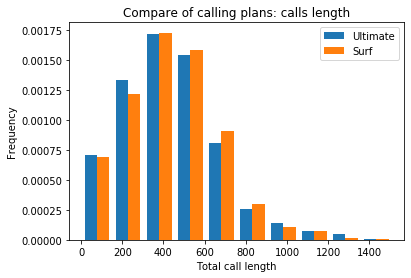

In [32]:
surf = df[df['plan'] == 'surf']
ultimate = df[df['plan'] == 'ultimate']



plt.hist([ultimate['total_call_time'],surf['total_call_time']],label= ['Ultimate','Surf'], density = True)
plt.legend()
plt.title('Compare of calling plans: calls length')
plt.xlabel('Total call length')
plt.ylabel('Frequency')

plt.show()



Here and further we are using density parameter to get comparable bars in the graph. 

It very interesting, that the graph shows, that Megaline customers monthly call time almost independent from the calling plan each customer have: as we can see on the graph, all the trends are very similar. 
In this particular case of call duration we can say, that levels the gradient are slightly different with _Ultimate_ having more users who make shorter calls and _Surf_ having more users who make longer calls. The data and the graph are slightly skewed to the right. 

The distribution is normal with a mean ca. 436. In both calling plans this value is below the additional paying threshold.

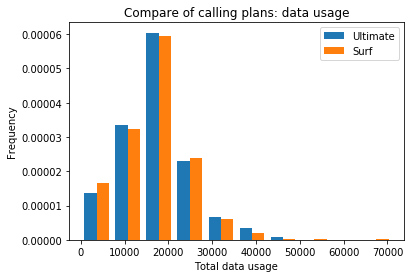

In [33]:
plt.hist([ultimate['total_mb_used'],surf['total_mb_used']],label= ['Ultimate','Surf'], density = True)
plt.legend()
plt.title('Compare of calling plans: data usage')
plt.xlabel('Total data usage')
plt.ylabel('Frequency')

plt.show()



In this case we also see,  that Megaline customers monthly used data volume almost independent from the calling plan each customer have: all the trends are very similar. 

There are more _Surf_ than _Ultimate_ customers, how spend around 5 Gb data monthly. But the most of customers use monthly more data and the difference btw. _Surf_ and _Ultimate_ users is really small. The group of _Surf_ customers how spend around 25 Gb/month is even a bit bigger than similar group of _Ultimate_ users. 

Mean values for each plan are around 17 Gb. That means, that average _Surf_ customer have to pay some additional fee for used mobile data, since only 15 Gb are included in their monthly charge. The average _Ultimate_ user spend less mobile data than he/she can spend without extra charges. 

The distribution is quite normal with the data skewed to the right. 

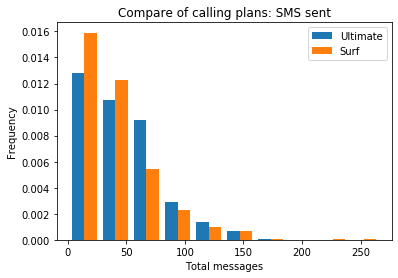

In [34]:
plt.hist([ultimate['total_messages'],surf['total_messages']],label= ['Ultimate','Surf'], density = True)
plt.legend()
plt.title('Compare of calling plans: SMS sent')
plt.xlabel('Total messages')
plt.ylabel('Frequency')

plt.show()

In [35]:
plans_pivot = pd.pivot_table(df, index='plan', values=['total_messages', 'total_mb_used', 'total_call_time', 'total_revenue'], 
                                                         aggfunc=['mean', 'median', 'var', 'std'])

plans_pivot

mean                                             \
         total_call_time total_mb_used total_messages total_revenue   
plan                                                                  
surf          436.802461  16737.361361      40.109656     57.670239   
ultimate      435.286517  17258.613352      46.296233     72.117526   

                  median                                             \
         total_call_time total_mb_used total_messages total_revenue   
plan                                                                  
surf               430.0       16945.5           32.0     37.431641   
ultimate           425.5       16887.0           41.0     70.000000   

                     var                                             \
         total_call_time total_mb_used total_messages total_revenue   
plan                                                                  
surf        52481.561083  6.229040e+07    1091.344231   2905.424897   
ultimate    56387.085163  6.143726e+07    1085.183108    116.331160   

                     std                                             
         total_call_time total_mb_used total_messages total_revenue  
plan                                                                 
surf          229.088544   7892.426749      33.035500     53.901993  
ultimate      237.459650   7838.192189      32.942118     10.785692

Length of calls mean values of both calling plans are almost equal (436/435 minutes). Used megabites mean value of _Ultimate_ customers is slightly higher (17258/16737 mb). An average _Ultimate_ customer sends monthly 46 SMSs, it just a 5 messages more, than an average _Surf_ customer. 
    
That's supports our version we expressed earlier that consuming profiles of Megaline customers are similar regardless of the calling plan. 
    
It's interesting to compare mean and median values of monthly revenue: for _Ultimate_ customers that are 72.12 and 70.00 dollars respectively. That means, that most of _Ultimate_ customers do not really consume any services except the services included in the 70 dlollars monthly charge (3000 monthly minutes, 1000 text messages, and 30 GB of data).  
    
For _Surf_ customers that are 57.67 and 37.43 dollars respectively. We know, that monthly charge for _Surf_ customers is 20 dollars. So we can claim, that an average _Surf_ customer consumes some additional services and generates monthly in average 17.43 dollars additional revenue. There are also some _Surf_ customers, how spends additionally much more then 17.43 dollars, and that's the reason, why the mean value is significantly higher than median. 
    
Length of calls and especially used megabitesThe variance values for both calling plans are extremly high, that says, that the set of corresponding numbers are spread out from their mean and from one anotherfar, far away. Total_messages variance values for both calling plans are significantly lower; that means, that there were not too much customers how send incredibly many messages (much more than 41/46 mean values). 
    
Total_revenue variance values for both calling plans let us to confirm, that we already knew: that there are just a few _Ultimate_ customers and much more _Surf_ customers, who generate addditional revenue (extra to their monthly charge). 
    
Since the standart deviation is a square root of corresponding variance values, all we said above about variance is also applicable to ST values. 

In this case we can see a real difference btw. _Surf_ and _Ultimate_ customers: _Surf_ users has higher values than _Ultimate_ users for for the groups how send less than 50 SMS/month. The amount of users how send 50+ decaying exponentially for both calling plans.


The data is strongly skewed to the right here. The mean values are 40 and 46 SMS/month for _Surf/Ultimate_ customers. In both calling plans this values are below the additional paying threshold.

### Step 3. Conclusion

In this section we founded the key metrics of Megaline users consumption. The most important point is that consuming profiles of customers are similar regardless of the calling plan. 

The crucial value is the average mobile data consumption. It's almost equal for both calling plans (Around 17 Gb/month; only 15 Gb are included in _Surf_ calling plan).

This implies, that an average _Surf_ customer generate a great additional revenue, which can be even higher than standart monthly fee. 

# Step 4. Test the hypotheses

Let's check, if the average revenue from users of _Ultimate_ and _Surf_ calling plans differs. 

We formulate the null hypothese as 'The average revenue from users of _Ultimate_ and _Surf_ calling plans does not differ' and the alternative one as 'The average revenue from users of _Ultimate_ and _Surf_ calling plans does (signuficantly) differ'.

We use an alpha of 0.05 as a 5% confidence threshold. 

We are going to compare the average monthly revenue of _Surf_ customers with the similar figures calculated for _Ultimate_ customers. 

In [36]:
sample_surf = df.groupby(['plan'])['total_revenue'].get_group('surf')
sample_ultimate = df.groupby(['plan'])['total_revenue'].get_group('ultimate')

ultimate_mu = sample_ultimate.mean()
surf_mu = sample_surf.mean()
ultimate_sd = sample_ultimate.std()
surf_sd = sample_surf.std()

print('Ultimate µ', ultimate_mu)
print()
print('Surf µ',surf_mu)
print()
print('Ultimate SD', ultimate_sd)
print()
print('Surf SD',surf_sd)
#display(sample_surf.head(10))



Ultimate µ 72.11752605965124

Surf µ 57.67023872902153

Ultimate SD 10.785692363642115

Surf SD 53.901993446007744


Such a big difference btw. standart deviation of calling plans let use save the further calculations in this case and claim, that our hypothesis 'The average revenue from users of _Ultimate_ and _Surf_ calling plans does not differ' should be rejected. 

But let's check it. 

In [37]:
surf_pivot = pivot_revenue[pivot_revenue['plan'] == 'surf']

#print(surf_pivot.head())
#print(len(surf_pivot))

ultimate_pivot = pivot_revenue[pivot_revenue['plan'] == 'ultimate']

#print(len(ultimate_pivot))

In [38]:

monthly_revenue_surf = surf_pivot['avg_revenue_per_month'].tolist()
monthly_revenue_ultimate = ultimate_pivot['avg_revenue_per_month'].tolist()

res = st.ttest_ind(monthly_revenue_surf, monthly_revenue_ultimate)
print(res)

Ttest_indResult(statistic=-2.214460934877995, pvalue=0.027249113655400312)


With pvalue 0.027249 < 0.05 we have received a confirmation that our hypothesis 'The average revenue from users of _Ultimate_ and _Surf_ calling plans does not differ' should be rejected.

Let's check another hypothesis. 

We formulate the null hypothese as 'The average revenue from users in NY-NJ area is NOT different from that of the users from other regions' and the alternative one as 'The average revenue from users in NY-NJ area is (signuficantly) different from that of the users from other regions'

We use an alpha of 0.05 as a 5% confidence threshold. We are goint to compare the average monthly revenue in NY/NJ area with the similar figures calculated for other regions. 

We assume that the variances are equal since all the calculations and graphs we showed above seems to confirm that.

At first we have to change out dataframe a bit. 

In [39]:
def filter_NY(row):
    if 'NY' in row['city'] or 'NJ' in row['city']:
        return 'NY-NJ'
    else:
        return 'Other city'

In [40]:
pivot_revenue['city'] = pivot_revenue.apply(filter_NY, axis=1)
#print(pivot_revenue.head())

In [41]:
pivot_NY_NJ = pivot_revenue.query('city == "NY-NJ"')
pivot_other_city = pivot_revenue.query('city == "Other city"')

NY_mu = pivot_NY_NJ['avg_revenue_per_month'].mean()
other_city_mu = pivot_other_city['avg_revenue_per_month'].mean()

NY_sd = pivot_NY_NJ['avg_revenue_per_month'].std()
other_city_sd = pivot_other_city['avg_revenue_per_month'].std()

print('NY/NJ µ', NY_mu)
print()
print('Other city µ',other_city_mu)
print()
print('NY/NJ SD', NY_sd)
print()
print('Other city SD', other_city_sd)


NY/NJ µ 23.41450625126416

Other city µ 23.999594058301845

NY/NJ SD 20.96587760191082

Other city SD 22.25958897333643


In [42]:
monthly_revenue_NY_NJ = pivot_NY_NJ['avg_revenue_per_month'].tolist()
monthly_revenue_other_city = pivot_other_city['avg_revenue_per_month'].tolist()

In [43]:
res2 = st.ttest_ind(monthly_revenue_NY_NJ, monthly_revenue_other_city)

print(res2)

Ttest_indResult(statistic=-0.24049789719722564, pvalue=0.8100432642400786)


With pvalue 0.81 > 0.05 we can not reject our hypothesis 'The average revenue from users in NY-NJ area is NOT different from that of the users from other regions'. 

### Step 4. Conclusion

In this step we performed some statistical analysis of out data. We rejected one and not rejected another hypothesis we had. 

# Step 5. Overall conclusion

In this project we performed an exhaustively research on telecom operator Megaline's prepaid calling plans.

The commercial department wanted to know which of the calling plans brings in more revenue in order to adjust the advertising budget.


We got raw data of 500 current Megaline customers; the data was in pretty good condition, so we had just a bit preprocess it. We also processed the data in out dataset by casting the optimal datatype for each column. Therefore we saved up to 40% of used memory without reducing our amount of data.

We founded the key metrics of Megaline users consumption: the number of calls made, minutes used, the number of text messages sent, the volume of data and the revenue per month per each user. 

By plotting the histograms, we comared the key values depending on the used calling plan. 

It was really surprizing and very important in the same time, that consuming profiles of customers are similar regardless of the calling plan. 

We founded out, that the crucial value is the average mobile data consumption. It's almost equal for both calling plans: around 17 Gb/month; but only 15 Gb are included in _Surf_ calling plan.

This implies, that an average _Surf_ customer generate a great additional revenue, which can be even higher than standart monthly fee. 

Thus we discovered, that the _Surf_ plan is a great money maker for Megaline: in top-20 customers how spend the most amount of money there are only 6 with _Ultimate_ plan; in top-10 there is only one(!!!) _Ultimate_ customer. 

Finally we performed some statistical analysis of out data. We rejected the hypotesis, that thare is no significant difference between the revenue of _Surf_ and _Ultimate_ calling plans and founded confirmation, that an average revenue in NY/NJ metropolitane area is higher, that in other cities. 

Obtained date can be used by the commercial department to determine an advertisement strategy and to adjust the advertisement budget.